# KNN Unidimensional - Problema dos Pássaros Noturnos

Classifique o comportamento de um pássaro como noturno ou diurno, tendo como informação o horário de seu pico de atividade.

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [110]:
class Animal:
    def __init__(self, activity_time:float, habit:str):
        self.activity_time = activity_time # in hours
        self.habit = habit # diurne or nocturne

(array([0., 0., 0., 0., 3., 2., 1., 0., 0., 0., 0., 0., 1., 2., 2.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ,
        16.5, 18. , 19.5, 21. , 22.5]),
 <BarContainer object of 15 artists>)

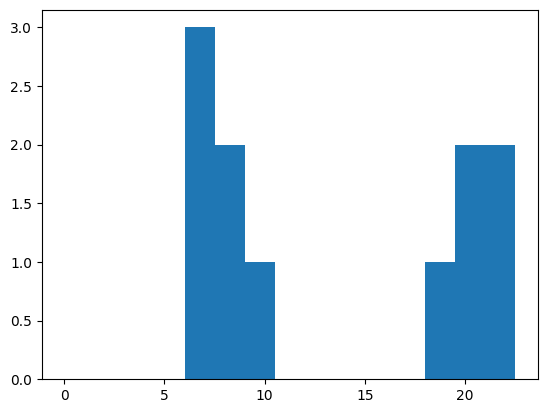

In [111]:
samples = [
    Animal(9, 'diurne'),
    Animal(7, 'diurne'),
    Animal(19, 'nocturne'),
    Animal(21, 'nocturne'),
    Animal(20.5, 'nocturne'),
    Animal(6.5, 'diurne'),
    Animal(20.5, 'nocturne'),
    Animal(8, 'diurne'),
    Animal(8.5, 'diurne'),
    Animal(6.5, 'diurne'),
    Animal(23.5, 'nocturne'),
    Animal(22, 'nocturne')
]

times = [x.activity_time for x in samples]

plt.hist(times, bins=np.arange(0,24,1.5))

In [112]:
class HabitClassifier:
    def __init__(self):
        self.samples = []
        self.diurne_animals = []
        self.nocturne_animals = []


    def __init__(self, samples):
        self.samples = samples
        self.diurne_animals = []
        self.nocturne_animals = []
        self.add_sample(samples)
    
    
    def add_sample(self, sample):
        for animal in sample:
            if animal.habit == 'diurne':
                self.diurne_animals.append(animal)
            elif animal.habit == 'nocturne':
                self.nocturne_animals.append(animal)
              
                
    def predict_habit(self, animal: Animal):
        diurne_habit_distance = HabitClassifier.habit_distance(animal, self.diurne_animals)
        nocturne_habit_distance = HabitClassifier.habit_distance(animal, self.nocturne_animals)
        
        if diurne_habit_distance < nocturne_habit_distance:
            return 'diurne'
        else:
            return 'nocturne'
    
    
    def habit_distance(animal: Animal, sample: [Animal]):
        sample_size = len(sample)
        distance = 0
        
        for sample_animal in sample:
            distance = distance + (HabitClassifier.time_activity_distance(animal, sample_animal)/sample_size)
            
        return distance
            
            
    def time_activity_distance(animal_a: Animal, animal_b: Animal):
        distance = np.absolute(animal_a.activity_time - animal_b.activity_time)
        return distance

In [113]:
habit_classifier = HabitClassifier(samples)

In [114]:
habit_classifier.predict_habit(Animal(19.5, None))

'nocturne'

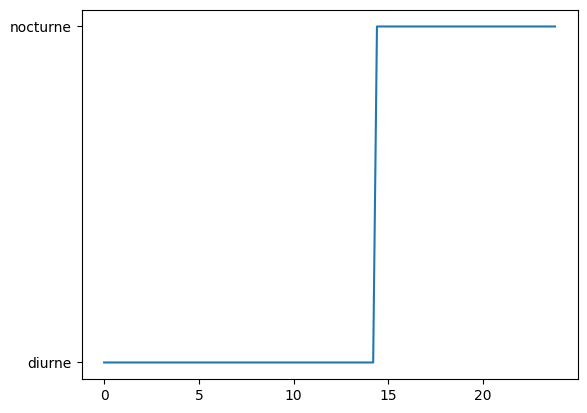

In [116]:
all_day_times = np.arange(0,24,0.2)
habits = []

for time in all_day_times:
    habits.append(habit_classifier.predict_habit(Animal(time, None)))
    
plt.plot(all_day_times, habits)